In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [164]:
# Code starts here

# Load the train data
train = pd.read_csv("G:/Data Science ML AI/Python files/Projects/Project_Linear_Regression_The_Lego_Collector's_Dilemma/train.csv")
train.head(10)

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,8,155.8800,202,2469,4.7,1,4.9,9,4.7,7,0
1,26,19.9900,9,252,4.8,0,4.6,39,4.6,20,1
2,26,91.6980,56,659,4.6,0,4.6,34,3.9,4,2
3,11,24.3878,1,19,3.0,5,4.0,13,4.0,10,3
4,7,609.9878,84,4016,4.5,1,3.9,34,3.5,10,4
5,3,42.6878,0,1,0.0,5,0.0,24,0.0,8,5
6,29,69.9900,19,944,3.6,0,4.2,38,4.6,20,6
7,11,42.6390,0,38,0.0,5,0.0,13,0.0,9,7
8,23,19.9900,2,139,4.5,2,4.0,39,3.5,20,8
9,22,20.2971,5,223,4.7,2,4.4,8,5.0,18,9


In [165]:
# Shape of the data
print("Shape of the data is:", train.shape)

Shape of the data is: (8582, 11)


In [166]:
#Checking statistical properties of data
print("Statistical properties of data are as follows")
print(train.describe())

Statistical properties of data are as follows
              ages   list_price  num_reviews  piece_count  play_star_rating  \
count  8582.000000  8582.000000  8582.000000  8582.000000       8582.000000   
mean     16.649149    64.493463    14.680727   486.677464          3.697809   
std       8.186261    89.871631    34.867561   802.789725          1.653742   
min       0.000000     2.272400     0.000000     1.000000          0.000000   
25%      11.000000    19.990000     1.000000    95.000000          3.600000   
50%      19.000000    36.587800     4.000000   214.000000          4.400000   
75%      23.000000    71.298000    12.000000   544.000000          4.700000   
max      30.000000  1104.870000   367.000000  7541.000000          5.000000   

       review_difficulty  star_rating   theme_name  val_star_rating  \
count        8582.000000  8582.000000  8582.000000      8582.000000   
mean            1.994640     3.904649    20.482172         3.597448   
std             1.792387     

In [167]:
#Dropping column ID
train.drop('Id',axis=1,inplace=True)
train.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,8,155.8800,202,2469,4.7,1,4.9,9,4.7,7
1,26,19.9900,9,252,4.8,0,4.6,39,4.6,20
2,26,91.6980,56,659,4.6,0,4.6,34,3.9,4
3,11,24.3878,1,19,3.0,5,4.0,13,4.0,10
4,7,609.9878,84,4016,4.5,1,3.9,34,3.5,10


In [168]:
# Checking for skewness in the features
print("Skewness for different features is shown as below")
print(train.skew())

Skewness for different features is shown as below
ages                -0.481067
list_price           4.693097
num_reviews          5.766014
piece_count          3.900989
play_star_rating    -1.538192
review_difficulty    0.491316
star_rating         -1.803453
theme_name           0.126847
val_star_rating     -1.477671
country              0.032907
dtype: float64


In [169]:
# Split into features and target
X = train.drop("list_price",axis=1)
y = train['list_price']

In [170]:
#Reading features (X)
X.head(10)

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,8,202,2469,4.7,1,4.9,9,4.7,7
1,26,9,252,4.8,0,4.6,39,4.6,20
2,26,56,659,4.6,0,4.6,34,3.9,4
3,11,1,19,3.0,5,4.0,13,4.0,10
4,7,84,4016,4.5,1,3.9,34,3.5,10
5,3,0,1,0.0,5,0.0,24,0.0,8
6,29,19,944,3.6,0,4.2,38,4.6,20
7,11,0,38,0.0,5,0.0,13,0.0,9
8,23,2,139,4.5,2,4.0,39,3.5,20
9,22,5,223,4.7,2,4.4,8,5.0,18


In [171]:
#Reading Target (y)
y.head(10)

0    155.8800
1     19.9900
2     91.6980
3     24.3878
4    609.9878
5     42.6878
6     69.9900
7     42.6390
8     19.9900
9     20.2971
Name: list_price, dtype: float64

In [172]:
# Separate into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.3,random_state=6)

In [173]:
#Data Visualization

#Checking the best plots for plotting between continuous features and try making some inferences from these plots.

cols = X_train.columns
print("Below columns are present in dataset:")
print(cols)

Below columns are present in dataset:
Index(['ages', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country'],
      dtype='object')


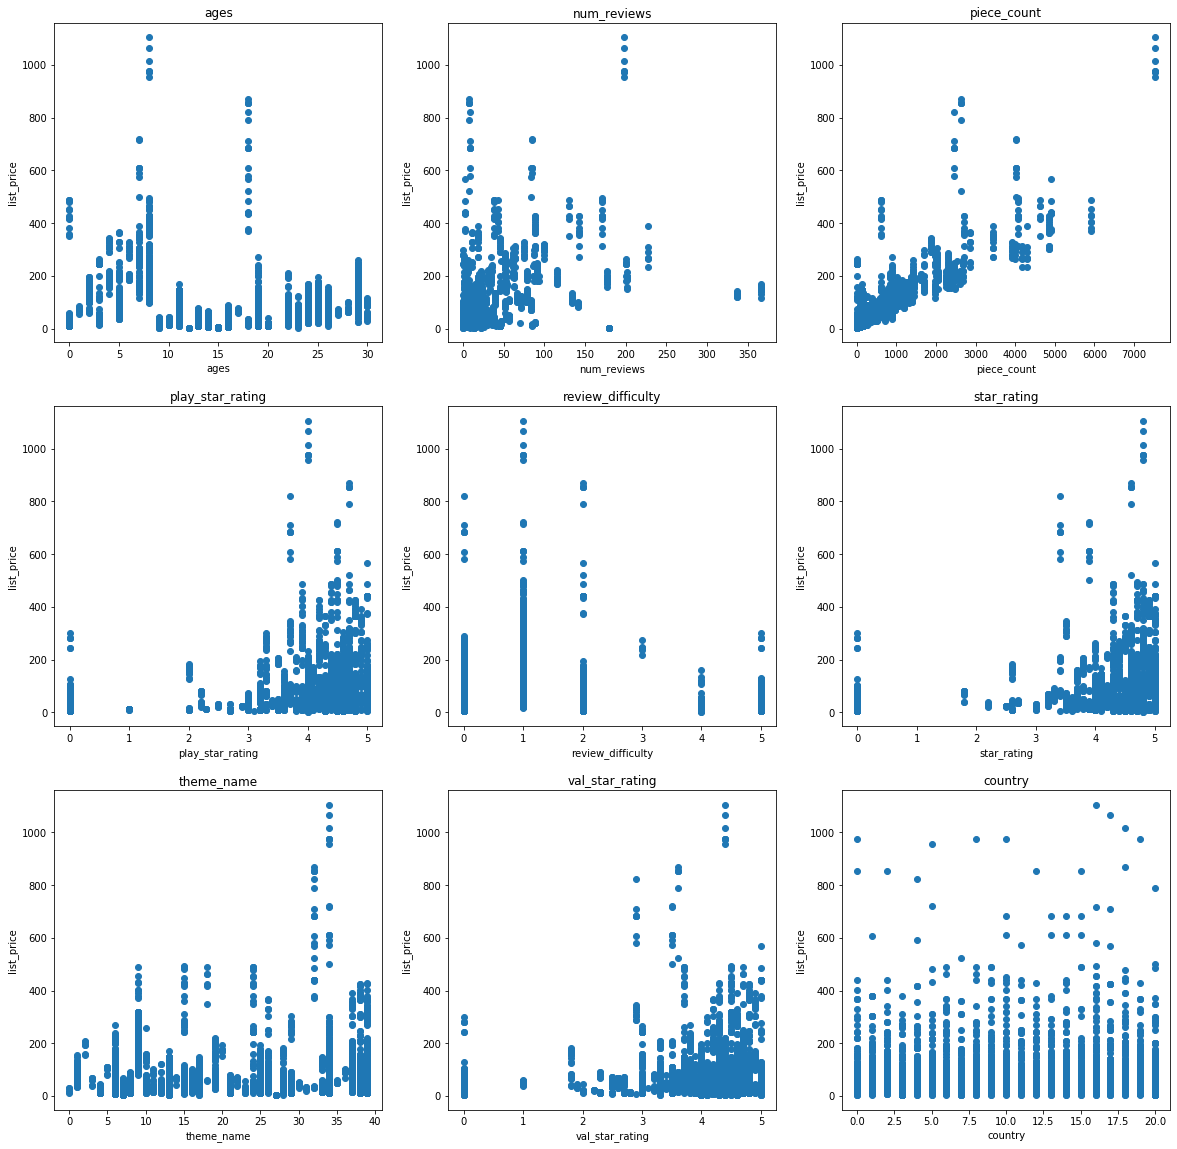

In [174]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20,20))

for i in range(0,3):
    for j in range(0,3):
        col = cols[i*3 + j]
        axes[i,j].set_title(col)
        axes[i,j].scatter(X_train[col],y_train)
        axes[i,j].set_xlabel(col)
        axes[i,j].set_ylabel('list_price')
        
plt.show()

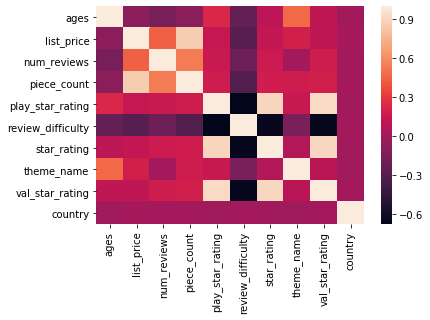

In [175]:
#Feature Selection

#selecting suitable threshold and dropping columns

# Plotting a heatmap using to check for correlation between the features
sns.heatmap(train.corr())

In [176]:
# Selecting upper and lower threshold

upper_threshold = 0.5
lower_threshold = -0.5

# List the correlation pairs
correlation = train.corr().unstack().sort_values(kind='quicksort')
correlation

review_difficulty  play_star_rating    -0.670508
play_star_rating   review_difficulty   -0.670508
val_star_rating    review_difficulty   -0.650333
review_difficulty  val_star_rating     -0.650333
star_rating        review_difficulty   -0.637901
review_difficulty  star_rating         -0.637901
piece_count        review_difficulty   -0.312239
review_difficulty  piece_count         -0.312239
list_price         review_difficulty   -0.284760
review_difficulty  list_price          -0.284760
                   ages                -0.239683
ages               review_difficulty   -0.239683
review_difficulty  num_reviews         -0.196846
num_reviews        review_difficulty   -0.196846
ages               num_reviews         -0.160969
num_reviews        ages                -0.160969
theme_name         review_difficulty   -0.153948
review_difficulty  theme_name          -0.153948
piece_count        ages                -0.090685
ages               piece_count         -0.090685
list_price         a

In [177]:
# Select the highest correlation pairs having correlation greater than upper threshold and lower than lower threshold
corr_var_list = correlation[((correlation>upper_threshold) | (correlation<lower_threshold)) & (correlation!=1)]
print(corr_var_list)

review_difficulty  play_star_rating    -0.670508
play_star_rating   review_difficulty   -0.670508
val_star_rating    review_difficulty   -0.650333
review_difficulty  val_star_rating     -0.650333
star_rating        review_difficulty   -0.637901
review_difficulty  star_rating         -0.637901
num_reviews        piece_count          0.542924
piece_count        num_reviews          0.542924
list_price         piece_count          0.866119
piece_count        list_price           0.866119
star_rating        play_star_rating     0.902573
play_star_rating   star_rating          0.902573
star_rating        val_star_rating      0.908720
val_star_rating    star_rating          0.908720
play_star_rating   val_star_rating      0.921824
val_star_rating    play_star_rating     0.921824
dtype: float64


In [178]:
# drop columns from X_train
X_train.drop(['play_star_rating','val_star_rating'],axis = 1 ,inplace=True)
X_train.head(10)

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
5994,13,0,85,5,0.0,21,0
2437,11,1,15,2,4.0,13,10
2529,25,4,422,0,4.8,8,20
5865,7,201,1996,1,4.8,34,19
1899,16,18,217,2,2.6,17,3
6877,11,3,28,0,4.3,13,8
1785,19,14,97,2,4.1,34,5
4005,19,9,92,2,4.7,34,10
8430,13,2,67,4,5.0,21,3
6851,29,19,944,0,4.2,38,10


In [179]:
X_test.drop(['play_star_rating','val_star_rating'], axis = 1 ,inplace=True)
X_test.head(10)

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
6272,23,18,254,2,4.2,37,18
1262,19,0,109,5,0.0,8,11
8379,9,0,41,5,0.0,13,8
4989,8,337,1334,1,4.7,9,5
6452,0,1,135,4,4.0,4,19
1353,4,22,2595,0,4.7,39,13
4758,13,3,59,2,5.0,21,4
7357,26,47,409,2,4.1,34,3
8231,14,5,66,2,4.8,7,0
3561,29,8,876,0,5.0,38,3


In [180]:
#Model building

#Instantiate linear regression model
regressor = LinearRegression()

# fit the model
regressor.fit(X_train,y_train)

# predict the result
y_pred = regressor.predict(X_test)
y_pred

array([46.13327416, 26.48886866, 27.47720914, ..., 54.18993735,
       17.43645416, 35.17913195])

In [181]:
# Calculate mse
mse = mean_squared_error(y_test, y_pred)
print(mse)

2385.6155401803844


In [182]:
# Calculate r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7327716226983414


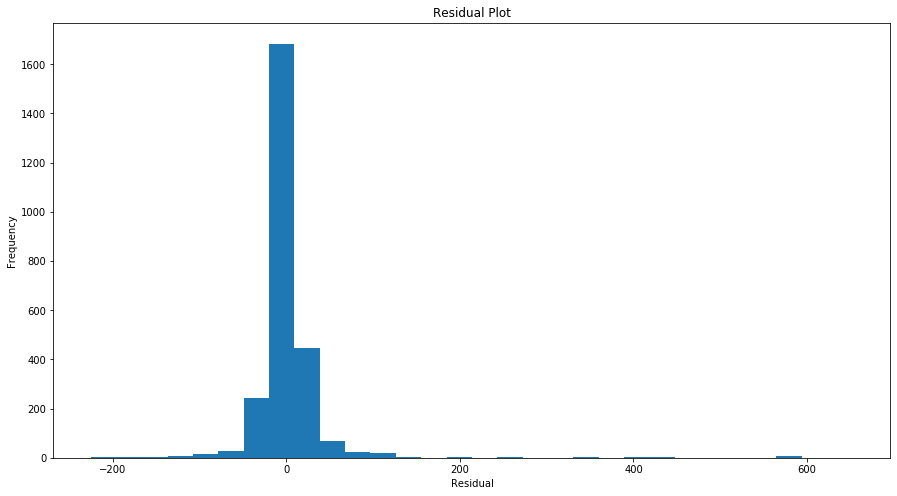

In [183]:
#Residual check

#checking the distrubution of residuals
residual = (y_test - y_pred)

# plot the figure for residual
plt.figure(figsize=(15,8))
plt.hist(residual, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Plot")
plt.show()


In [184]:
#Prediction on the test data and creating the sample submission file.

#Load the test data and store the Id column in a separate variable.
#Perform the same operations on the test data that you have performed on the train data.


# Prediction on test data

# Read the test data
test = pd.read_csv("G:/Data Science ML AI/Python files/Projects/Project_Linear_Regression_The_Lego_Collector's_Dilemma/test.csv")
test.head(10)

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,26,8,941,4.6,0,4.6,33,4.3,16,9907
1,11,0,19,0.0,5,0.0,13,0.0,7,5243
2,29,34,1376,4.0,1,4.3,34,3.8,12,8276
3,26,0,369,0.0,5,0.0,28,0.0,9,6501
4,11,1,19,3.0,5,4.0,13,4.0,0,1619
5,19,3,246,5.0,2,4.0,17,4.0,2,2226
6,7,201,1996,3.9,1,4.8,34,4.5,10,7130
7,25,3,1019,5.0,2,5.0,20,4.3,2,2272
8,25,4,422,4.0,0,4.8,8,4.3,16,9594
9,0,11,91,3.8,4,4.9,4,4.7,20,38


In [185]:
# Storing the id from the test file
id_ = test['Id']

# Dropping the same columns from the test data
test.drop(['Id','play_star_rating','val_star_rating'],1,inplace=True)
test.head()

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
0,26,8,941,0,4.6,33,16
1,11,0,19,5,0.0,13,7
2,29,34,1376,1,4.3,34,12
3,26,0,369,5,0.0,28,9
4,11,1,19,5,4.0,13,0


In [187]:
# Predict on the test data
y_pred_test = regressor.predict(test)
y_pred_test


array([114.07826338,  24.06263899, 148.658779  , ...,  26.21106837,
        16.39527622,  18.42660112])

In [188]:
# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'list_price':y_pred_test})
sample_submission.head(20)


,Id,list_price
0,9907,114.078263
1,5243,24.062639
2,8276,148.658779
3,6501,55.820522
4,1619,6.998705
5,2226,37.439430
6,7130,205.190413
7,2272,104.628274
8,9594,53.661234
9,38,19.341204


In [193]:
# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission1.csv',index=False)